### In this notebook, the saved model is loaded and tested using some images that are not in dataset

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt

In [2]:
class_data = ['Jayaram','Mammootty','Mohanlal','Mukesh']

In [3]:
def get_cropped_image_if_2eyes(img_path):
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    img = cv2.imread(img_path)
    #img = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
    faces = face_cascade.detectMultiScale(img, 1.03, 5)
    for (x,y,w,h) in faces:
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
        #roi_img = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_color)
        if len(eyes) >=2:
            return roi_color

In [4]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [5]:
def model_prediction(model,img_path):
          
    roi_img = get_cropped_image_if_2eyes(img_path)
    if roi_img is not None:
        scaled_roi_img = cv2.resize(roi_img, (32, 32))
        wt_img = w2d(roi_img,'db1',5)
        scaled_wt_img = cv2.resize(wt_img, (32, 32))
        combined_img = np.vstack((scaled_roi_img.reshape(32*32*3,1),scaled_wt_img.reshape(32*32,1)))
        reshaped_img = np.array(combined_img).reshape(1,4096).astype(float)
        result = model.predict(reshaped_img)
        return(class_data[result[0]])

#### Loaded the trained model 

In [8]:
import joblib
model = joblib.load("actor_model.pkl")

#### Testing the model 

The image is not clear
No. of images detected: 12


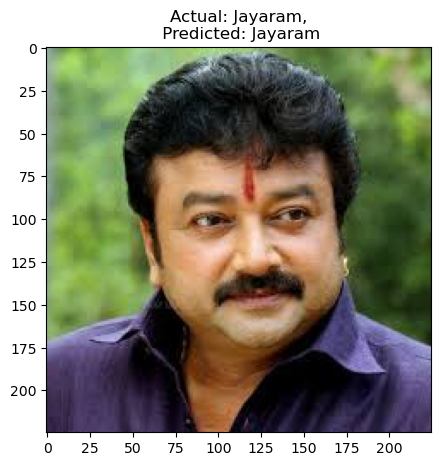

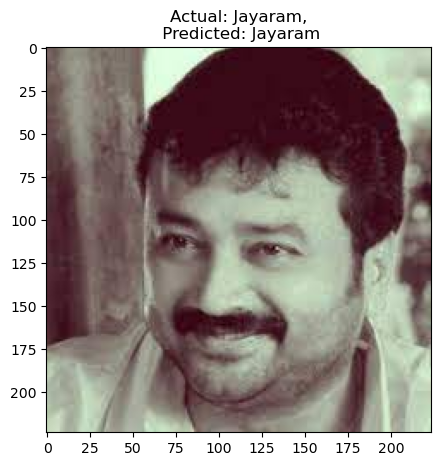

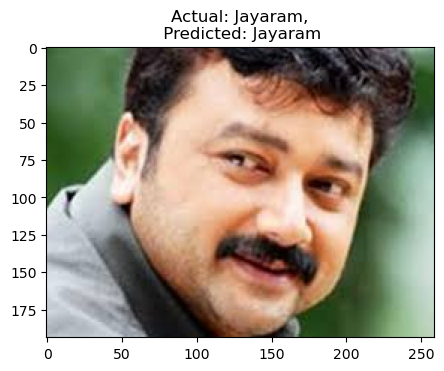

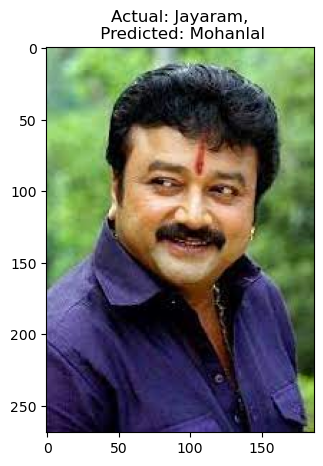

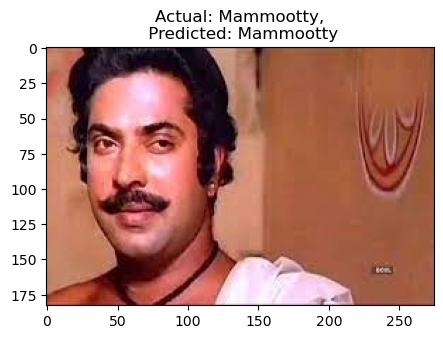

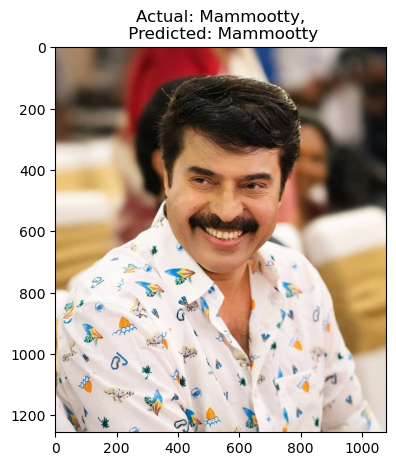

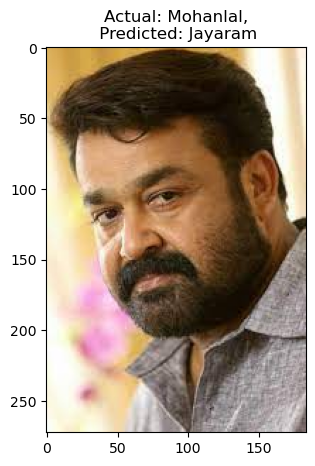

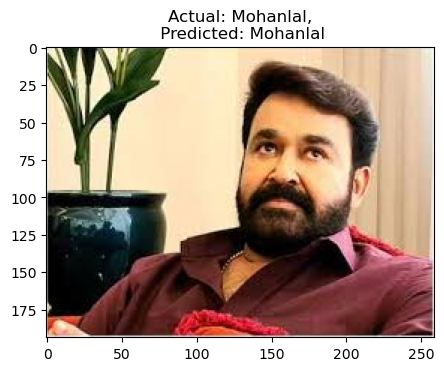

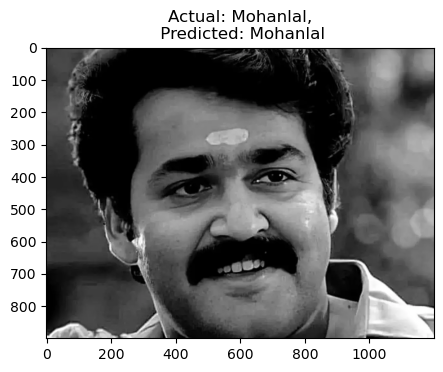

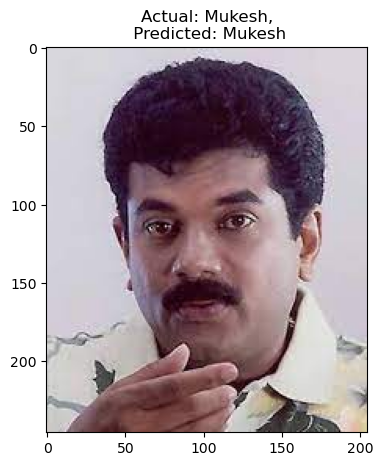

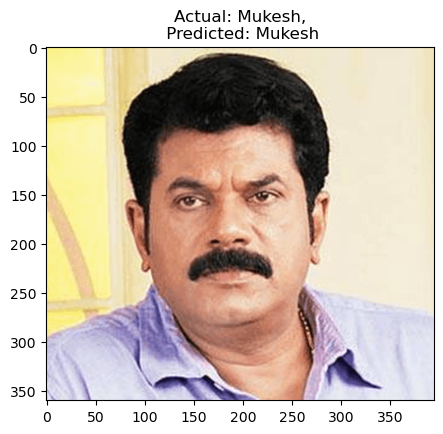

In [26]:
test_img_path = r"C:\Users\User\OneDrive\ANACONDA\Proj_09_Malayalam_Movie_Actors_Recognition\Test_images"
count = 0
for i in range(0,4):
    test_dir = test_img_path + '\\'+ class_data[i]
    for entry in os.scandir(test_dir):
        img1 = cv2.imread(entry.path)
        img = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
        result = model_prediction(model,entry.path)
        count += 1
        if result is not None:
            plt.figure(figsize=(5,5))
            #plt.subplot(6,2,i+1)
            plt.imshow(img)
            #plt.title(result)
            plt.title(f"Actual: {class_data[i]},\n Predicted: {result}")
        else:
            print("The image is not clear")
      
print("No. of images detected:", count)      

Out of 12 test images, 11 are readed and 9 predictions are correct